# New Section

In [1]:
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler

kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


## Import and Inspect the Data

Import the data set.

# Random Forest Regressor

Random Forest Regressor
Mean Squared Error (MSE): 357.99
R² Score: 0.284
Mean Absolute Error (MAE): 14.71
Relative Accuracy: 22.25%


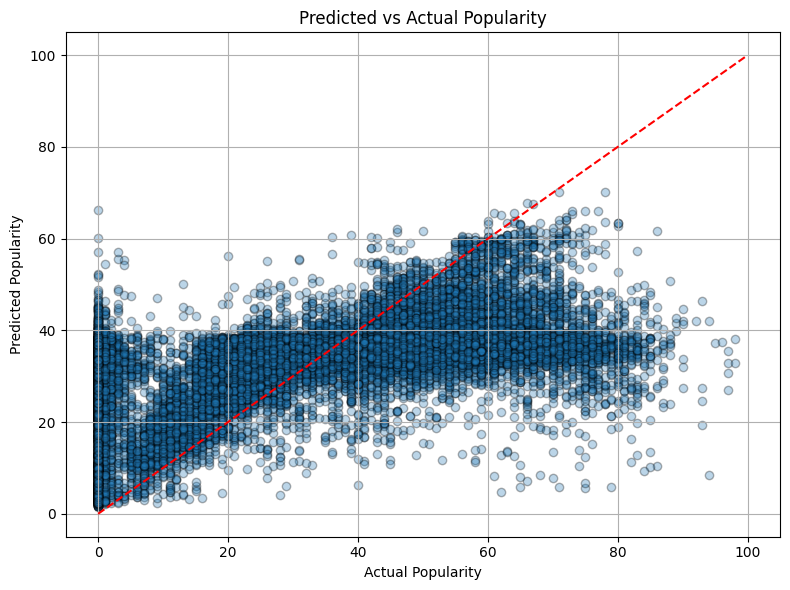

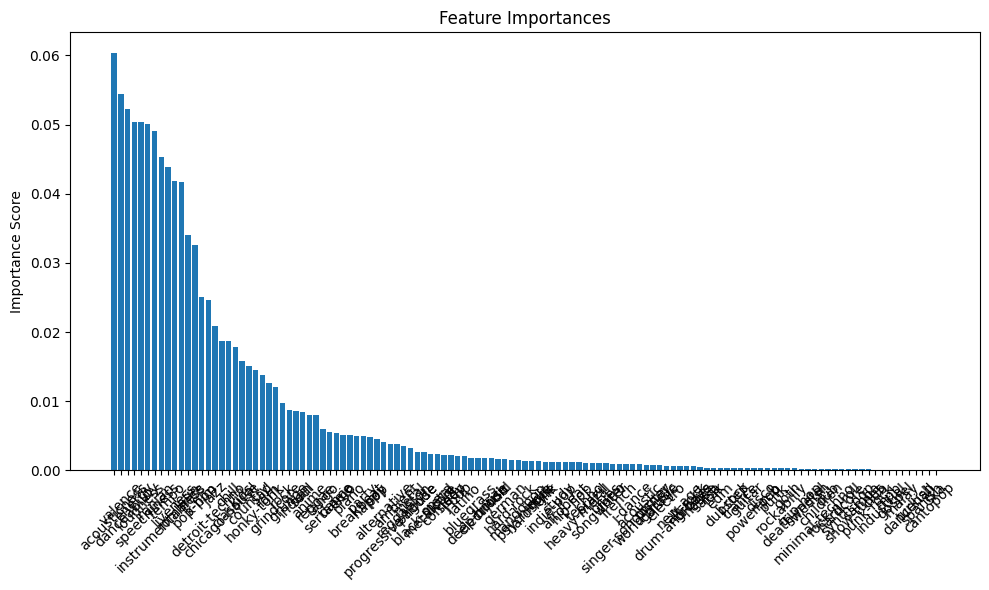

['models/feature_columns_rf.pkl']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import kagglehub
import joblib

dataset_path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")
df = pd.read_csv(dataset_path + "/dataset.csv")

df = df.dropna()

onehot = OneHotEncoder(sparse_output=False)
genre_encoded = onehot.fit_transform(df[['track_genre']])
genre_names = onehot.categories_[0]
genre_encoded_df = pd.DataFrame(genre_encoded, columns=genre_names)

columns_to_drop = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']
df_with_encoded_genres = pd.concat([df, genre_encoded_df], axis=1)
df_with_encoded_genres = df_with_encoded_genres.drop(columns=columns_to_drop)

numerical_features = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo'
]
features = numerical_features + list(genre_names)
target = 'popularity'

df_clean = df_with_encoded_genres.dropna(subset=features + [target])
df_sample = df_clean.sample(n=100000, random_state=42)

X = df_sample[features]
y = df_sample[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

forest = RandomForestRegressor(n_estimators=100, max_depth=30, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', bootstrap=True, random_state=42, n_jobs=-1)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy = 100 * (1 - (np.sum(np.abs(y_test - y_pred)) / np.sum(np.abs(y_test - np.mean(y_test)))))

print("Random Forest Regressor")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Relative Accuracy: {accuracy:.2f}%")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, edgecolors='k')
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Predicted vs Actual Popularity")
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.tight_layout()
plt.show()

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_features = [features[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), sorted_features, rotation=45)
plt.title("Feature Importances")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

joblib.dump(forest, 'models/random_forest.pkl')
joblib.dump(features, 'models/feature_columns_rf.pkl')

